#Predicting Rain in Australia

# Data Selection

>I have selected [Rain in Australia](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package) kaggle dataset for this assignment. The reason behind selecting this dataset is it contains both numeric and categorical data. Most of the real-world does not have any particular kind of data and this dataset is a good example of that. This gives a really good opportunity to understand real-world problems and ways to tackle them using data science.

>The dataset provides daily weather information from multiple weather stations across Australia between 2008 to 2017.

>The dataset is provided in CSV format which removes the initial step of converting the dataset into the desired format before loading in the Pandas Dataframe.

>After a glance at the dataset, it can be inferred that operations such as null value removal, dropping irrelevant columns and reformatting data columns needs to perform on the data.



In [0]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import time
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
cd drive/My Drive/Colab Notebooks/Data Analysis

/content/drive/My Drive/Colab Notebooks/Data Analysis


In [0]:
WeatherData = pd.read_csv('weatherAUS.csv')

#Data Scrubbing and Formatting

The data has been loaded into Pandas dataframe. Now, let's look at the first and last few rows of the data to conduct the initial analysis.


In [5]:
# Looking at the size of the dataset
WeatherData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null obje

The dataset consists of almost 142K data rows and has 24 data features. Now lets look at each columns in detail.

In [6]:
# Get the total number of data rows for each column
WeatherData.count()

Date             142193
Location         142193
MinTemp          141556
MaxTemp          141871
Rainfall         140787
Evaporation       81350
Sunshine          74377
WindGustDir      132863
WindGustSpeed    132923
WindDir9am       132180
WindDir3pm       138415
WindSpeed9am     140845
WindSpeed3pm     139563
Humidity9am      140419
Humidity3pm      138583
Pressure9am      128179
Pressure3pm      128212
Cloud9am          88536
Cloud3pm          85099
Temp9am          141289
Temp3pm          139467
RainToday        140787
RISK_MM          142193
RainTomorrow     142193
dtype: int64

We can see here there are 4 columns which have a lot of missing values and we need to drop those because they might affect the model. These columns are 'Evaporation', 'Sunshine', 'Cloud9am' and 'Cloud3pm'.

Also, we don't need 'Location' data because the data is about Australia and we are trying to predict the weather of Australia and not of any specific location.

In [0]:
# Dropping irrelevant columns
WeatherData = WeatherData.drop(columns=['Sunshine','Evaporation','Cloud3pm','Cloud9am','Location'],axis=1)

In [8]:
# Looking at first 5 rows of the dataset
WeatherData.head()

,Date,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,0.0,No
1,2008-12-02,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,0.0,No
2,2008-12-03,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,0.0,No
3,2008-12-04,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,1.0,No
4,2008-12-05,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,0.2,No


In [9]:
# Looking at last 5 rows of the dataset
WeatherData.tail()

,Date,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
142188,2017-06-20,3.5,21.8,0.0,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,No,0.0,No
142189,2017-06-21,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,0.0,No
142190,2017-06-22,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,0.0,No
142191,2017-06-23,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,0.0,No
142192,2017-06-24,7.8,27.0,0.0,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,No,0.0,No


In [10]:
# Get the total number of data rows for each column
WeatherData.count()

Date             142193
MinTemp          141556
MaxTemp          141871
Rainfall         140787
WindGustDir      132863
WindGustSpeed    132923
WindDir9am       132180
WindDir3pm       138415
WindSpeed9am     140845
WindSpeed3pm     139563
Humidity9am      140419
Humidity3pm      138583
Pressure9am      128179
Pressure3pm      128212
Temp9am          141289
Temp3pm          139467
RainToday        140787
RISK_MM          142193
RainTomorrow     142193
dtype: int64

The dataset still has missing values. There are multiple ways to handle missing values, we can take average value of a column and then replace all the null values with it but in this case we cannot do that because the data consists of both numerical and categorical values and also as we are going to predict the possibility of rain, this might affect the accuracy of the model. We need only original data for modeling.

In [0]:
# Dropping all the missing data rows
WeatherData = WeatherData.dropna(how='any')

In [12]:
# Get the total number of data rows for each column
WeatherData.count()


Date             112925
MinTemp          112925
MaxTemp          112925
Rainfall         112925
WindGustDir      112925
WindGustSpeed    112925
WindDir9am       112925
WindDir3pm       112925
WindSpeed9am     112925
WindSpeed3pm     112925
Humidity9am      112925
Humidity3pm      112925
Pressure9am      112925
Pressure3pm      112925
Temp9am          112925
Temp3pm          112925
RainToday        112925
RISK_MM          112925
RainTomorrow     112925
dtype: int64

Now all the columns have non-null values.

Next thing we need to do is the 'RainToday' and 'RainTommorw' columns have 'Yes/No' values which can be converted to '0 and 1' which can help the model.


In [0]:
# Replacing 'Yes/No' with '0 and 1'

WeatherData['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)

WeatherData['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)


In [14]:
# Minimum, maximum and standard deviation of the numeric columns
WeatherData.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
count,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000,112925.000000
mean,12.664721,23.655670,2.377892,40.786611,15.179163,19.500545,67.404162,50.669055,1017.425847,1015.048962,17.462008,22.127306,0.224654,2.326032,0.221554
std,6.254135,6.982702,8.602968,13.321774,8.344304,8.580097,18.911610,20.768550,7.032654,6.957822,6.355045,6.837380,0.417356,8.517106,0.415294
min,-8.200000,2.600000,0.000000,7.000000,2.000000,2.000000,0.000000,0.000000,980.500000,977.100000,-3.100000,1.700000,0.000000,0.000000,0.000000
25%,8.100000,18.300000,0.000000,31.000000,9.000000,13.000000,56.000000,36.000000,1012.800000,1010.300000,12.700000,16.900000,0.000000,0.000000,0.000000
50%,12.400000,23.100000,0.000000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.400000,1015.000000,17.100000,21.600000,0.000000,0.000000,0.000000
75%,17.200000,28.700000,0.800000,48.000000,20.000000,24.000000,81.000000,65.000000,1022.100000,1019.700000,22.000000,26.900000,0.000000,0.600000,0.000000
max,33.900000,48.100000,367.600000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,40.200000,46.700000,1.000000,371.000000,1.000000


There is always some kind of outliers in the dataset. We need to detect the outliers and remove them so they do not affect the model. The outlier is a value which is +/- 3 from its standard deviation value.

In [0]:
# Removing outliers from the dataset
WeatherData = WeatherData[(np.abs(stats.zscore(WeatherData._get_numeric_data())) < 3).all(axis=1)]

In [16]:
WeatherData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106447 entries, 0 to 142192
Data columns (total 19 columns):
Date             106447 non-null object
MinTemp          106447 non-null float64
MaxTemp          106447 non-null float64
Rainfall         106447 non-null float64
WindGustDir      106447 non-null object
WindGustSpeed    106447 non-null float64
WindDir9am       106447 non-null object
WindDir3pm       106447 non-null object
WindSpeed9am     106447 non-null float64
WindSpeed3pm     106447 non-null float64
Humidity9am      106447 non-null float64
Humidity3pm      106447 non-null float64
Pressure9am      106447 non-null float64
Pressure3pm      106447 non-null float64
Temp9am          106447 non-null float64
Temp3pm          106447 non-null float64
RainToday        106447 non-null int64
RISK_MM          106447 non-null float64
RainTomorrow     106447 non-null int64
dtypes: float64(13), int64(2), object(4)
memory usage: 16.2+ MB


#EDA- Exploratory Data Analysis

We now need to understand which columns of the dataset are correlated with each other. This may help us to remove highly correlated values thus reducing the dimension of the dataset. 

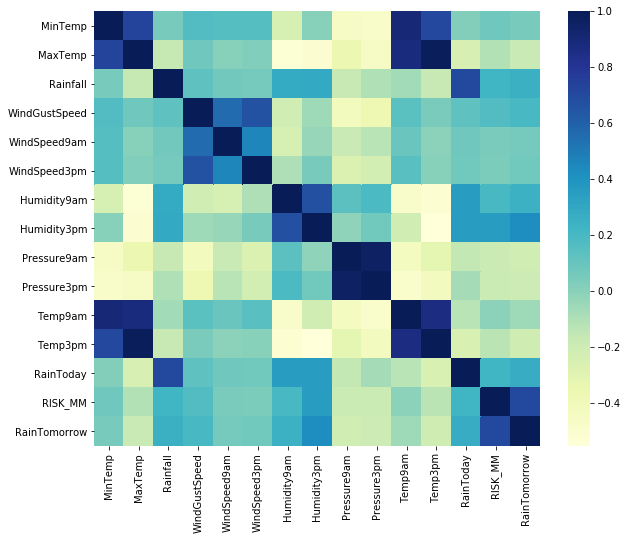

In [17]:
# Correlation Matrix between the columns
plt.figure(figsize=(10, 8))
sns.heatmap(WeatherData.corr(),cmap='YlGnBu')

As we can see in the heatmap there is a strong correlation between Temperature at 3 PM and that day's maximum temperature there is also a very strong correlation between the pressure values too.

We can plot a detailed graph on the highly correlated features.


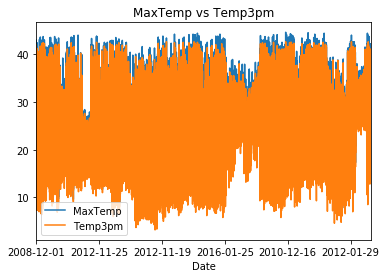

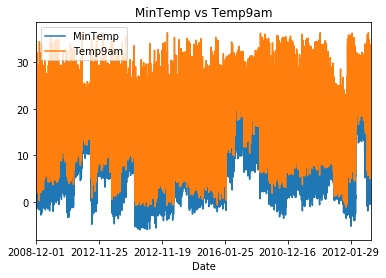

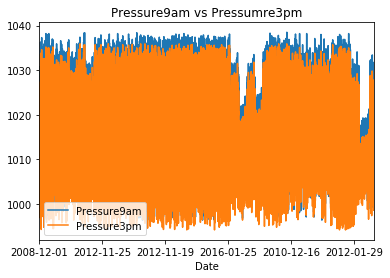

In [18]:
# Plotting the relationship graphs

WeatherData.plot(x="Date", y=["MaxTemp", "Temp3pm"], kind="line")
plt.title("MaxTemp vs Temp3pm")
plt.show()
WeatherData.plot(x="Date", y=["MinTemp", "Temp9am"], kind="line")
plt.title("MinTemp vs Temp9am")
plt.show()
WeatherData.plot(x="Date", y=["Pressure9am", "Pressure3pm"], kind="line")
plt.title("Pressure9am vs Pressumre3pm")
plt.show()

We can see above that the Temperature at 3 PM and Maximum temperature of the day have almost the same values. Similarly, the Temperature at 9 AM and Minimum temperature have the same values.

We can also see that the Pressure throughout the day remains kind of same.

Let us dig deeper into these columns to find how are they related to each other.


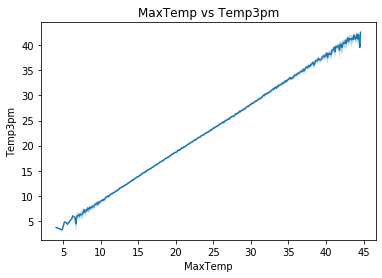

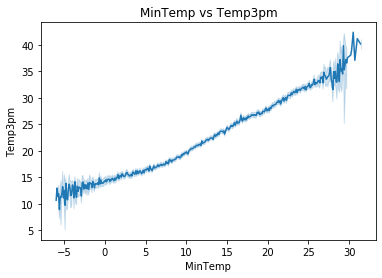

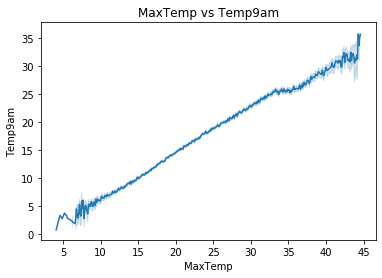

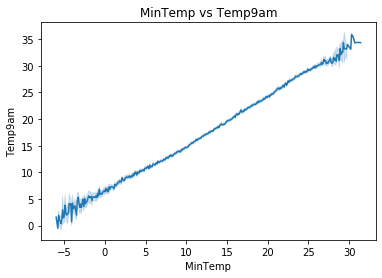

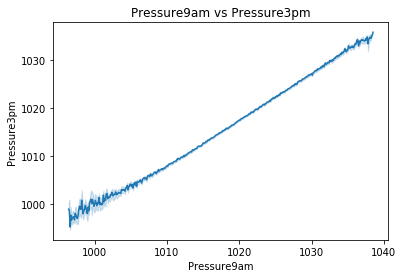

<Figure size 432x288 with 0 Axes>

In [19]:
sns.lineplot(data=WeatherData, x='MaxTemp', y='Temp3pm')
plt.title("MaxTemp vs Temp3pm")
plt.show()
sns.lineplot(data=WeatherData, x='MinTemp', y='Temp3pm')
plt.title("MinTemp vs Temp3pm")
plt.show()
sns.lineplot(data=WeatherData, x='MaxTemp', y='Temp9am')
plt.title("MaxTemp vs Temp9am")
plt.show()
sns.lineplot(data=WeatherData, x='MinTemp', y='Temp9am')
plt.title("MinTemp vs Temp9am")
plt.show()
sns.lineplot(data=WeatherData, x='Pressure9am', y='Pressure3pm')
plt.title("Pressure9am vs Pressure3pm")
plt.show()
plt.tight_layout()

We can see on the above graph that all the temperature values are linearly correlated with each other.

Also, the pressure during the day is linearly correlated.


#Selecting the Algorithm

> The first model I tested was the Logistics Regression. It is used when we want to answer yes/no type questions. Here, we are answering whether there will be rain tomorrow in Australia. Logistics regression finds the relation between one dependent variable and multiple independent variables. It uses a sigmoid function to calculate the relationships between the variables by calculating probabilities out of the prediction values. Using logistics regression we got 98% accuracy in 0.16 seconds.

> Decision tree creates a tree out of the dataset, it splits the dataset in binary and continuous to perform the prediction till no more splits are possible. It performs prediction just like human rationale thinking process, questions are answered in the yes/no format till it reaches to the leaf node and leaf node will be the answer (prediction). Using Decision tree we get 100% accuracy in 0.027 seconds.

> Random Forest classification is an ensemble learning scheme. It creates multiple decision trees and the prediction output from all the decision trees is evaluated. The most predicted output from these decision trees becomes the final predicted value. Using random forest classifier we got 100% accuracy in 1.95 seconds.

> I chose to use Logistics Regression model for the prediction because Decision tree and Random Forest classification models produce results with 100% accuracy, this is the example of a model which is overfitted. Overfitting is a condition when the model trains even on the noise or randomness of the data and it then produces 100% accurate model for the provided dataset. This affects the performance of the model in new unseen data. Because of overfitting, the prediction accuracy for new data is deteriorated. Another reason for not selecting Random Forest classification is the processing time, it is taking 1.95 seconds compared to 0.16 seconds of Logistics regression.





# Data Preparation

First we are dropping 'Date' column as it is not required for modelling.

In [0]:
# Dropping Date column 

WeatherData = WeatherData.drop(columns=['Date'],axis=1)

There are three columns in the dataset which has categorical values. As the logistic regressor cannot work with categorical values we need to create dummy variables.

In [0]:
# Converting categorical columns to numeric 

categorical_values = ['WindGustDir', 'WindDir3pm', 'WindDir9am']
WeatherData = pd.get_dummies(WeatherData, columns = categorical_values)

As we can see here we have values ranging from 0.1 to 1000, we need to scale these values so we can find which features of the dataset are best for predicting the rainfall.

In [0]:
WeatherData.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
#Scaling the values from -1 to 1.

min_max_scale = MinMaxScaler()

WeatherData = pd.DataFrame(min_max_scale.fit_transform(WeatherData),columns = WeatherData.columns)

All the values are now scaled within -1 to 1 range.

In [0]:
WeatherData.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
0,0.518717,0.464198,0.021429,0.506849,0.486486,0.523810,0.674157,0.22,0.268409,0.309353,0.478723,0.472081,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.358289,0.518519,0.000000,0.506849,0.054054,0.476190,0.370787,0.25,0.337292,0.326139,0.486702,0.535533,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.505348,0.533333,0.000000,0.534247,0.459459,0.571429,0.303371,0.30,0.266033,0.347722,0.587766,0.507614,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.406417,0.590123,0.000000,0.232877,0.243243,0.166667,0.382022,0.16,0.503563,0.446043,0.510638,0.591371,0.0,0.035971,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.628342,0.696296,0.035714,0.465753,0.135135,0.428571,0.797753,0.33,0.342043,0.282974,0.502660,0.672589,0.0,0.007194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We are predicting 'Rain Tomorrow' column, so we need to remove the column from the dataset.

In [0]:
# Assigning Rain Tomorrow column to new variable

Predict_RainTomorrow = WeatherData.RainTomorrow 

In [0]:
WeatherData = WeatherData.drop(columns=['RainTomorrow'],axis=1) # Removing the column from dataset

# Modelling

We now need to create the model.

To create the model the dataset should be split into two parts i.e. training data and testing data. 30% of data is test data and to create some randomness in splitting the data random state value is also provided.



In [0]:
# We now need to slice the data in two part training data and test data.

data_train, data_test, predict_train, predict_test = train_test_split(WeatherData, Predict_RainTomorrow, test_size=0.30, random_state=42)


In [0]:
data_train.shape

(74512, 62)

We can see here that the dataset have 62 data dimensions. We need to find which dimensions are relevant to the data.

As the dataset had categorical values we are going to use Univariate Feature selection method for finding the relevant data columns.

In [0]:
# Selecting relevant features

Feature_Selection = SelectKBest(chi2, k=4).fit(data_train, predict_train)

We can see here that "Risk_MM", "Rainfall", "RainToday", "Humidity3PM" columns are highly relevant with our prediction variable.

In [0]:
# Lets see which are the columns with highest score
best_features = {}
for x,y in zip(Feature_Selection.scores_, data_train.columns):
  best_features.update({x:y})
  
sorted(best_features.items())

[(0.43543086208696014, 'WindGustDir_SSW'),
 (0.47606279270274, 'WindDir3pm_SSW'),
 (1.1606931122478747, 'WindDir9am_SW'),
 (1.7169791019904517, 'WindDir9am_NE'),
 (2.0014657758704697, 'WindDir3pm_WSW'),
 (2.720956465156387, 'WindDir9am_SSW'),
 (2.9741123163631404, 'WindGustDir_SW'),
 (6.718338991111975, 'WindGustDir_NNE'),
 (7.096098245073415, 'WindGustDir_S'),
 (9.98018366094062, 'Temp9am'),
 (11.669733052779714, 'MinTemp'),
 (12.178809836999353, 'WindGustDir_WSW'),
 (13.822320185699523, 'WindDir3pm_S'),
 (18.65096005852388, 'WindDir9am_WSW'),
 (20.42539666348725, 'WindDir3pm_SW'),
 (21.00884858239956, 'WindDir3pm_NNE'),
 (22.55617445425508, 'WindDir3pm_NE'),
 (28.10945094382724, 'WindGustDir_NE'),
 (32.57006854803574, 'WindGustDir_SSE'),
 (33.45728148484312, 'WindSpeed3pm'),
 (33.97669287446819, 'WindDir9am_WNW'),
 (41.48085408948637, 'WindSpeed9am'),
 (48.157853664192345, 'WindDir3pm_SSE'),
 (50.64546465303724, 'WindDir3pm_W'),
 (54.03399724734501, 'WindDir9am_ENE'),
 (55.7176112057

We extracted 4 best features out of the 62 features. We are only going to use these 4 features for our model.

In [0]:
# Transform the dataset based on column relevance

data_train = Feature_Selection.transform(data_train)

data_test = Feature_Selection.transform(data_test)

In [0]:
data_train.shape

(74512, 4)

In [0]:
data_test.shape

(31935, 4)

Logistics regression model has been generated on the dataset.


In [0]:
# Logistics regression model is used for our purpose

t=time.time()
LogisticsRegressor = LogisticRegression(random_state=42)      
LogisticsRegressor = LogisticsRegressor.fit(data_train, predict_train)
print("Time Taken: "+str(time.time()-t))

Time Taken: 0.16490554809570312


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Testing the model with our test dataset we can see here we get 98% accuracy from the model.

In [0]:
# Making a prediction and calculting the accuracy

data_prediction = LogisticsRegressor.predict(data_test)

prediction_accuracy = accuracy_score(predict_test, data_prediction)

print('Accuracy: ',prediction_accuracy)

Accuracy:  0.980460310004697


We can visualize classification model performance by plotting confusion matrix. There are two classes in confusion matrix i.e. yes/no (1,0). We can see here that there are 4 quadrants, the first quadrant (0,0) is known as True Negatives and as the name suggests the model predicted that no rainfall happened and it is true. The second quadrant (0,1) is False Positives we have no false positives. The third quadrant (1,0) is False Negatives and we get 624 false negatives out of 31935 records which is almost 2% of the test dataset. The fourth quadrant (1,1) is True Positive. 

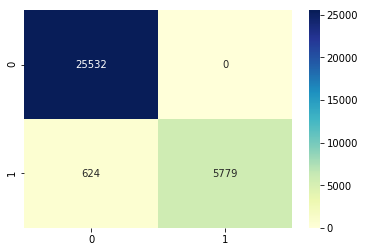

In [0]:
confusionMatrix = confusion_matrix(predict_test, data_prediction)
sns.heatmap(confusionMatrix, annot=True, fmt="d",cmap='YlGnBu')

# Fictional Data and Discussion

To test the accuracy of the prediction model two random values were taken. 



1.   Interpolated values
2.   Extrapolated values

The accuracy of the model is 50%. We can see in the confusion matrix that one value was identified as false positive. If we look deeper the model is not fit for extrapolated value because during assignment-3 we removed the outliers from the dataset. The model was trained on the original clean data. As the extrapolated value is something which is outside of the dataset value the prediction result gets affected. So, to get the effective result out of the dataset we need to remove the outliers.

In [0]:
#Lets create a fictional values regarding 5 features which are selected for the model and see how the prediction works
testDataValues = [(0.021, 0., 0.035, 0.),
                 (0.03,1.,0.02,1.)]
testPredictValue = [(0),(0)]

testDataset = pd.DataFrame(testDataValues,columns=['Rainfall','RainToday','RISK_MM','WindDir9am_N'])
testPredictData = pd.DataFrame(testPredictValue,columns=['RainTomorrow'])
testDataset = testDataset.to_numpy()
testPredictData = testPredictData.to_numpy()

In [0]:
# Testing prediction accuracy

testPrediction = LogisticsRegressor.predict(testDataset)

prediction_accuracy = accuracy_score(testPredictData, testPrediction)

print('Accuracy: ',prediction_accuracy)

Accuracy:  0.5


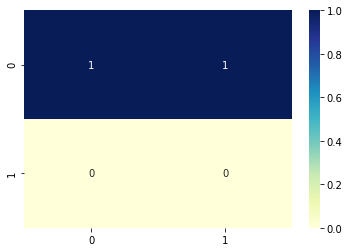

In [0]:
confusionMatrix = confusion_matrix(testPredictData, testPrediction)
sns.heatmap(confusionMatrix, annot=True, fmt="d",cmap='YlGnBu')

# Summary

The data cleaning process was performed at first by removing all the irrelevant data features, missing values, and outliers. Exploratory data analysis was conducted and found the correlation between minimum, the maximum, temperature at 9 am and temperature at 3 pm columns. The analysis revealed that these columns are linearly correlated which means we only need minimum and maximum temperature values. Afterward, the data was scaled in -1 to 1 range, categorical values were converted into numerical values and the dataset was split into training and test dataset. Most important data features were extracted by using Univariate Feature Selection algorithm and the Logistics Regression model was built on these features.


The model produced 98% accuracy on the test data. The model accuracy was reduced when outlier dataset was provided.